# **State wise analysis for the Improvement of quality of Indian Education**

Education is a fundamental pillar for the development and progress of any nation, particularly for a country like India, where diverse socio-economic factors impact access and quality. This project, titled "State Wise Analysis for the Improvement of the Quality of Education in India," aims to examine the various factors affecting education across different states. By employing data analysis tools and methodologies, the project seeks to identify disparities, trends, and areas for improvement, thereby proposing targeted interventions. Aligning with Sustainable Development Goal 4 (SDG 4): Quality Education, this initiative strives to ensure inclusive and equitable quality education and derive insights on how various factors can affect it.

----------------------------------------------------------------------------------

# **About the dataset**

## Key Features of the Dataset

**State Wise data for:**

- **Drop out Ratio:** The percentage of students failing to complete their education
- **Gross Enrolment Ratio:** The ratio of total enrolment, regardless of age, to the population of the age group that officially corresponds to the level of education shown.

### The state wise data for Primary, Upper Primary, Secondary, Higher secondary schools on the following parameters:

- Schools with electricity
- Schools with computers
- Schools with water
- Schools with Girls Toilets
- Schools with Boys Toilets



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
drop_out = pd.read_csv("/content/dropout-ratio-2012-2015.csv")
gross_en = pd.read_csv("/content/gross-enrollment-ratio-2013-2016.csv")
school_with_comp = pd.read_csv("/content/percentage-of-schools-with-comps-2013-2016.csv")
school_with_elec = pd.read_csv("/content/percentage-of-schools-with-electricity-2013-2016.csv")
school_with_water =pd.read_csv("/content/percentage-of-schools-with-water-facility-2013-2016.csv")
school_with_boyt = pd.read_csv("/content/schools-with-boys-toilet-2013-2016.csv")
school_with_girlt= pd.read_csv("/content/schools-with-girls-toilet-2013-2016.csv")

# **Cleaning the CSV files**

### **1. Drop out ratio**

In [ ]:
drop_out.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [ ]:
drop_out.describe()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,110,110,110,110,110,110,110,110,110,110,110,110,110,110
unique,40,3,93,87,87,91,97,96,106,107,106,81,76,78
top,A & N Islands,2013-14,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
freq,3,37,15,15,17,16,8,9,4,4,4,28,34,31


In [ ]:
drop_out.isnull()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False,False,False,False,False
108,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
drop_out.dropna()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,West Bengal,2013-14,3.44,2.37,2.91,5.63,3.1,4.31,16.73,19.77,18.34,8.03,7.76,7.9
106,West Bengal,2014-15,2.13,0.79,1.47,5.84,2.88,4.3,16.33,19.06,17.8,8.18,8.04,8.11
107,All India,2012-13,4.68,4.66,4.67,2.3,4.01,3.13,14.54,14.54,14.54,NR,NR,NR
108,All India,2013-14,4.53,4.14,4.34,3.09,4.49,3.77,17.93,17.79,17.86,1.48,1.61,1.54


In [ ]:
drop_outc = drop_out[~drop_out.isin(['NR']).any(axis=1)]
print(drop_outc)

                 State_UT     year Primary_Boys Primary_Girls Primary_Total  \
0           A & N Islands  2012-13         0.83          0.51          0.68   
2           A & N Islands  2014-15         0.47          0.55          0.51   
4          Andhra Pradesh  2013-14         4.31          4.39          4.35   
6      Arunachal  Pradesh  2013-14        11.54         10.22         10.89   
7       Arunachal Pradesh  2012-13        15.84         14.44         15.16   
8       Arunachal Pradesh  2014-15        11.51         10.09         10.82   
9                   Assam  2012-13         7.02          5.46          6.24   
10                  Assam  2013-14         8.19          6.68          7.44   
20           Chhattisgarh  2014-15         3.08          2.74          2.91   
22   Dadra & Nagar Haveli  2013-14         1.05          2.17          1.57   
23   Dadra & Nagar Haveli  2014-15          1.6          1.31          1.47   
25            Daman & Diu  2013-14         1.06     

In [ ]:
drop_outc.shape

(56, 14)

In [ ]:
null_values = drop_outc.isnull().sum()
print("\nNumber of null values in each column after cleaning:")
print(null_values)


Number of null values in each column after cleaning:
State_UT               0
year                   0
Primary_Boys           0
Primary_Girls          0
Primary_Total          0
Upper Primary_Boys     0
Upper Primary_Girls    0
Upper Primary_Total    0
Secondary _Boys        0
Secondary _Girls       0
Secondary _Total       0
HrSecondary_Boys       0
HrSecondary_Girls      0
HrSecondary_Total      0
dtype: int64


### **2. Gross Enrollment ratio**

In [ ]:
gross_en.shape
gross_en.isnull()
gross_en.dropna()
gross_enc= gross_en[~gross_en.isin(['NR']).any(axis=1)]
null_values2 = gross_enc.isnull().sum()
print("\nNumber of null values in each column after cleaning:")
print(null_values2)



Number of null values in each column after cleaning:
State_UT                  0
Year                      0
Primary_Boys              0
Primary_Girls             0
Primary_Total             0
Upper_Primary_Boys        0
Upper_Primary_Girls       0
Upper_Primary_Total       0
Secondary_Boys            0
Secondary_Girls           0
Secondary_Total           0
Higher_Secondary_Boys     0
Higher_Secondary_Girls    0
Higher_Secondary_Total    0
dtype: int64


### **3. Schools with Computers**

In [ ]:

school_with_comp.isnull()
school_with_comp.dropna()
school_with_compc= school_with_comp[~school_with_comp.isin(['NR']).any(axis=1)]
null_values3 = school_with_compc.isnull().sum()
print("\nNumber of null values in each column after cleaning:")
print(null_values3)



Number of null values in each column after cleaning:
State_UT                            0
year                                0
Primary_Only                        0
Primary_with_U_Primary              0
Primary_with_U_Primary_Sec_HrSec    0
U_Primary_Only                      0
U_Primary_With_Sec_HrSec            0
Primary_with_U_Primary_Sec          0
U_Primary_With_Sec                  0
Sec_Only                            0
Sec_with_HrSec.                     0
HrSec_Only                          0
All Schools                         0
dtype: int64


### **4. Schools with electricity**

In [ ]:
school_with_elec.isnull()
school_with_elec.dropna()
school_with_elecc= school_with_elec[~school_with_elec.isin(['NR']).any(axis=1)]
null_values4 = school_with_elecc.isnull().sum()
print("\nNumber of null values in each column after cleaning:")
print(null_values4)


Number of null values in each column after cleaning:
State_UT                            0
year                                0
Primary_Only                        0
Primary_with_U_Primary              0
Primary_with_U_Primary_Sec_HrSec    0
U_Primary_Only                      0
U_Primary_With_Sec_HrSec            0
Primary_with_U_Primary_Sec          0
U_Primary_With_Sec                  0
Sec_Only                            0
Sec_with_HrSec.                     0
HrSec_Only                          0
All Schools                         0
dtype: int64


### **5. Schools with water facilities**


In [ ]:
school_with_water.isnull()
school_with_water.dropna()
school_with_waterc= school_with_water[~school_with_water.isin(['NR']).any(axis=1)]
null_values5 = school_with_waterc.isnull().sum()
print("\nNumber of null values in each column after cleaning:")
print(null_values5)


Number of null values in each column after cleaning:
State/UT                            0
Year                                0
Primary_Only                        0
Primary_with_U_Primary              0
Primary_with_U_Primary_Sec_HrSec    0
U_Primary_Only                      0
U_Primary_With_Sec_HrSec            0
Primary_with_U_Primary_Sec          0
U_Primary_With_Sec                  0
Sec_Only                            0
Sec_with_HrSec.                     0
HrSec_Only                          0
All Schools                         0
dtype: int64


### **6. Schools with Girls toilets**

In [ ]:
school_with_girlt.isnull()
school_with_girlt.dropna()
school_with_girltc= school_with_girlt[~school_with_girlt.isin(['NR']).any(axis=1)]
null_values7 = school_with_girltc.isnull().sum()
print("\nNumber of null values in each column after cleaning:")
print(null_values7)


Number of null values in each column after cleaning:
State_UT                            0
year                                0
Primary_Only                        0
Primary_with_U_Primary              0
Primary_with_U_Primary_Sec_HrSec    0
U_Primary_Only                      0
U_Primary_With_Sec_HrSec            0
Primary_with_U_Primary_Sec          0
U_Primary_With_Sec                  0
Sec_Only                            0
Sec_with_HrSec.                     0
HrSec_Only                          0
All Schools                         0
dtype: int64


In [ ]:
school_with_boyt.isnull()
school_with_boyt.dropna()
school_with_boytc= school_with_boyt[~school_with_boyt.isin(['NR']).any(axis=1)]
null_values6= school_with_girltc.isnull().sum()
print("\nNumber of null values in each column after cleaning:")
print(null_values6)


Number of null values in each column after cleaning:
State_UT                            0
year                                0
Primary_Only                        0
Primary_with_U_Primary              0
Primary_with_U_Primary_Sec_HrSec    0
U_Primary_Only                      0
U_Primary_With_Sec_HrSec            0
Primary_with_U_Primary_Sec          0
U_Primary_With_Sec                  0
Sec_Only                            0
Sec_with_HrSec.                     0
HrSec_Only                          0
All Schools                         0
dtype: int64


# Extraction of the Cleaned Datasets for the statewise report

In [ ]:
drop_outc.to_csv('DropoutRatio.csv', index=False)
gross_enc.to_csv('GrossEnrollment.csv', index=False)
school_with_compc.to_csv('SchoolWithComp.csv', index=False)
school_with_elecc.to_csv('SchoolWithElec.csv', index=False)
school_with_waterc.to_csv('SchoolWithWater.csv', index=False)
school_with_girltc.to_csv('SchoolWithGirlt.csv', index=False)

# **Exploratory Data Analysis 1**



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

computers_df= pd.read_csv('SchoolWithComp.csv')
electricity_df= pd.read_csv('SchoolWithElec.csv')

In [ ]:

merged_data = pd.merge(computers_df, electricity_df, on=['State_UT', 'year'], suffixes=('_comp', '_elec'))

In [ ]:
print(computers_df.head())
print(electricity_df.head())

                    State_UT     year  Primary_Only  Primary_with_U_Primary  \
0  Andaman & Nicobar Islands  2013-14         30.40                   73.68   
1  Andaman & Nicobar Islands  2014-15         30.94                   76.54   
2  Andaman & Nicobar Islands  2015-16         28.44                   78.57   
3             Andhra Pradesh  2013-14         12.73                   42.72   
4             Andhra Pradesh  2014-15         10.29                   44.15   

   Primary_with_U_Primary_Sec_HrSec  U_Primary_Only  U_Primary_With_Sec_HrSec  \
0                             89.74            0.00                    100.00   
1                             92.11          100.00                     94.74   
2                             92.50            0.00                     94.74   
3                             86.99           45.45                     17.07   
4                             88.46           50.00                     62.22   

   Primary_with_U_Primary_Sec  U_Prima

In [ ]:
merged_data = pd.merge(computers_df, electricity_df, on=['State_UT', 'year'], suffixes=('_comp', '_elec'))

In [ ]:

features = [col for col in merged_data.columns if '_elec' in col]
target = 'All Schools_comp'

X = merged_data[features]
y = merged_data[target]

X.fillna(X.mean(), inplace=True)

<ipython-input-165-f18b38469c66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

                                  Feature  Importance
4           U_Primary_With_Sec_HrSec_elec    0.250491
1             Primary_with_U_Primary_elec    0.195774
10                       All Schools_elec    0.184753
3                     U_Primary_Only_elec    0.084883
9                         HrSec_Only_elec    0.081824
0                       Primary_Only_elec    0.062629
7                           Sec_Only_elec    0.045016
5         Primary_with_U_Primary_Sec_elec    0.032727
6                 U_Primary_With_Sec_elec    0.031040
8                    Sec_with_HrSec._elec    0.018396
2   Primary_with_U_Primary_Sec_HrSec_elec    0.012466


In [ ]:
# Assuming merged_data is the dataset with features and target
all_predictions = model.predict(X)

# Add predictions to the dataset
merged_data['Predicted_All_Schools'] = all_predictions

In [ ]:
statewise_results = merged_data.groupby('State_UT').agg({
    'All Schools_comp': 'mean',           # Actual values
    'Predicted_All_Schools': 'mean'       # Predicted values
}).reset_index()

print(statewise_results)

                     State_UT  All Schools_comp  Predicted_All_Schools
0                   All India         25.936667              22.629133
1   Andaman & Nicobar Islands         55.770000              51.170444
2              Andhra Pradesh         29.406667              36.623000
3           Arunachal Pradesh         24.440000              24.837933
4                       Assam          9.813333              10.369567
5                       Bihar          7.676667              11.190033
6                  Chandigarh         95.263333              94.408936
7                Chhattisgarh         11.460000              16.147633
8        Dadra & Nagar Haveli         40.320000              48.066577
9                 Daman & Diu         63.820000              60.414761
10                      Delhi         82.150000              81.775634
11                        Goa         42.953333              52.661627
12                    Gujarat         74.266667              69.454527
13    

In [ ]:
# Calculate error metrics for each state
statewise_results['Error'] = statewise_results['All Schools_comp'] - statewise_results['Predicted_All_Schools']
statewise_results['Absolute_Error'] = statewise_results['Error'].abs()

print(statewise_results)

                     State_UT  All Schools_comp  Predicted_All_Schools  \
0                   All India         25.936667              22.629133   
1   Andaman & Nicobar Islands         55.770000              51.170444   
2              Andhra Pradesh         29.406667              36.623000   
3           Arunachal Pradesh         24.440000              24.837933   
4                       Assam          9.813333              10.369567   
5                       Bihar          7.676667              11.190033   
6                  Chandigarh         95.263333              94.408936   
7                Chhattisgarh         11.460000              16.147633   
8        Dadra & Nagar Haveli         40.320000              48.066577   
9                 Daman & Diu         63.820000              60.414761   
10                      Delhi         82.150000              81.775634   
11                        Goa         42.953333              52.661627   
12                    Gujarat         

#**Scatter Plot : Electricity and Computer**

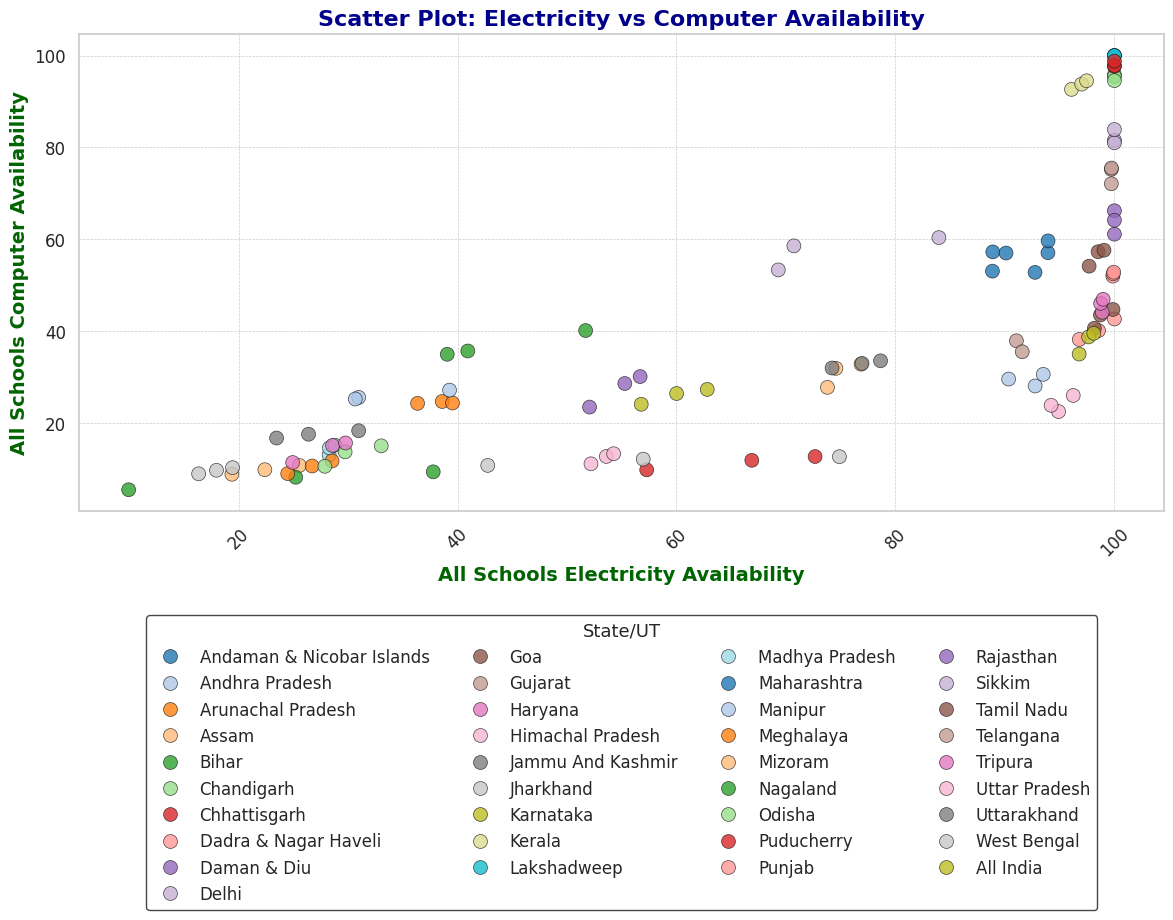

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=merged_data,
    x='All Schools_elec',
    y='All Schools_comp',
    hue='State_UT',
    palette='tab20',
    alpha=0.8,
    s=100,
    edgecolor='k',
    linewidth=0.5
)

plt.title('Scatter Plot: Electricity vs Computer Availability', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('All Schools Electricity Availability', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('All Schools Computer Availability', fontsize=14, fontweight='bold', color='darkgreen')

legend = scatter.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), title='State/UT', fontsize=12, title_fontsize='13', ncol=4)
legend.get_frame().set_edgecolor('k')
legend.get_frame().set_linewidth(1)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(bottom=0.3)


#**Linear Regression**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

computers_df = pd.read_csv('SchoolWithComp.csv')
electricity_df = pd.read_csv('SchoolWithElec.csv')

In [ ]:

merged_data = pd.merge(computers_df, electricity_df, on=['State_UT', 'year'], suffixes=('_comp', '_elec'))

print(merged_data.head())

                    State_UT     year  Primary_Only_comp  \
0  Andaman & Nicobar Islands  2013-14              30.40   
1  Andaman & Nicobar Islands  2014-15              30.94   
2  Andaman & Nicobar Islands  2015-16              28.44   
3             Andhra Pradesh  2013-14              12.73   
4             Andhra Pradesh  2014-15              10.29   

   Primary_with_U_Primary_comp  Primary_with_U_Primary_Sec_HrSec_comp  \
0                        73.68                                  89.74   
1                        76.54                                  92.11   
2                        78.57                                  92.50   
3                        42.72                                  86.99   
4                        44.15                                  88.46   

   U_Primary_Only_comp  U_Primary_With_Sec_HrSec_comp  \
0                 0.00                         100.00   
1               100.00                          94.74   
2                 0.00       

In [ ]:

features = [col for col in merged_data.columns if '_elec' in col]
target = 'All Schools_comp'
X = merged_data[features]
y = merged_data[target]
X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-175-16002493ec1b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 327.1320065128071
R-squared: 0.6681349397576581


In [ ]:

coefficients = model.coef_
feature_importances = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print(feature_importances.sort_values(by='Coefficient', ascending=False))

all_predictions = model.predict(X)

merged_data['Predicted_All_Schools'] = all_predictions

                                  Feature  Coefficient
10                       All Schools_elec     1.591666
4           U_Primary_With_Sec_HrSec_elec     0.231683
2   Primary_with_U_Primary_Sec_HrSec_elec     0.148817
9                         HrSec_Only_elec    -0.022037
3                     U_Primary_Only_elec    -0.043522
6                 U_Primary_With_Sec_elec    -0.048311
8                    Sec_with_HrSec._elec    -0.057281
1             Primary_with_U_Primary_elec    -0.118866
7                           Sec_Only_elec    -0.124157
5         Primary_with_U_Primary_Sec_elec    -0.157755
0                       Primary_Only_elec    -0.634715


In [ ]:

statewise_results = merged_data.groupby('State_UT').agg({
    'All Schools_comp': 'mean',
    'Predicted_All_Schools': 'mean'
}).reset_index()

statewise_results['Error'] = statewise_results['All Schools_comp'] - statewise_results['Predicted_All_Schools']
statewise_results['Absolute_Error'] = statewise_results['Error'].abs()

print(statewise_results)

                     State_UT  All Schools_comp  Predicted_All_Schools  \
0                   All India         25.936667              28.967067   
1   Andaman & Nicobar Islands         55.770000              67.973013   
2              Andhra Pradesh         29.406667              42.633819   
3           Arunachal Pradesh         24.440000              22.982853   
4                       Assam          9.813333               0.934116   
5                       Bihar          7.676667               9.079500   
6                  Chandigarh         95.263333              80.228223   
7                Chhattisgarh         11.460000              31.050193   
8        Dadra & Nagar Haveli         40.320000              54.943458   
9                 Daman & Diu         63.820000              53.918273   
10                      Delhi         82.150000              63.113218   
11                        Goa         42.953333              63.719658   
12                    Gujarat         

#**Providing students with access to technology can significantly enhance their learning experiences. Schools equipped with modern technological tools and computers can draw more students who are eager to acquire tech skills and broaden their educational horizons.**

Providing students with access to technology can significantly enhance their learning experiences. Schools equipped with modern technological tools can draw more students who are eager to acquire tech skills and broaden their educational horizons. This access not only fosters a greater interest in learning but also equips students with essential skills for the future. By integrating technology into the curriculum, schools can offer a more diverse array of educational resources and opportunities, enabling students to explore various subjects in depth and stay updated with the latest advancements in their fields of interest. This approach helps create a more engaging and inclusive learning environment, preparing students for a rapidly evolving digital world.

# Prediction : Gross Enrollment

Mean Absolute Error: 1.3906809523809305
Mean Squared Error: 6.760127008333177
R-squared: 0.9891564888974582
Correlation between predicted and actual gross enrollment: 0.9989017907126045


<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, 

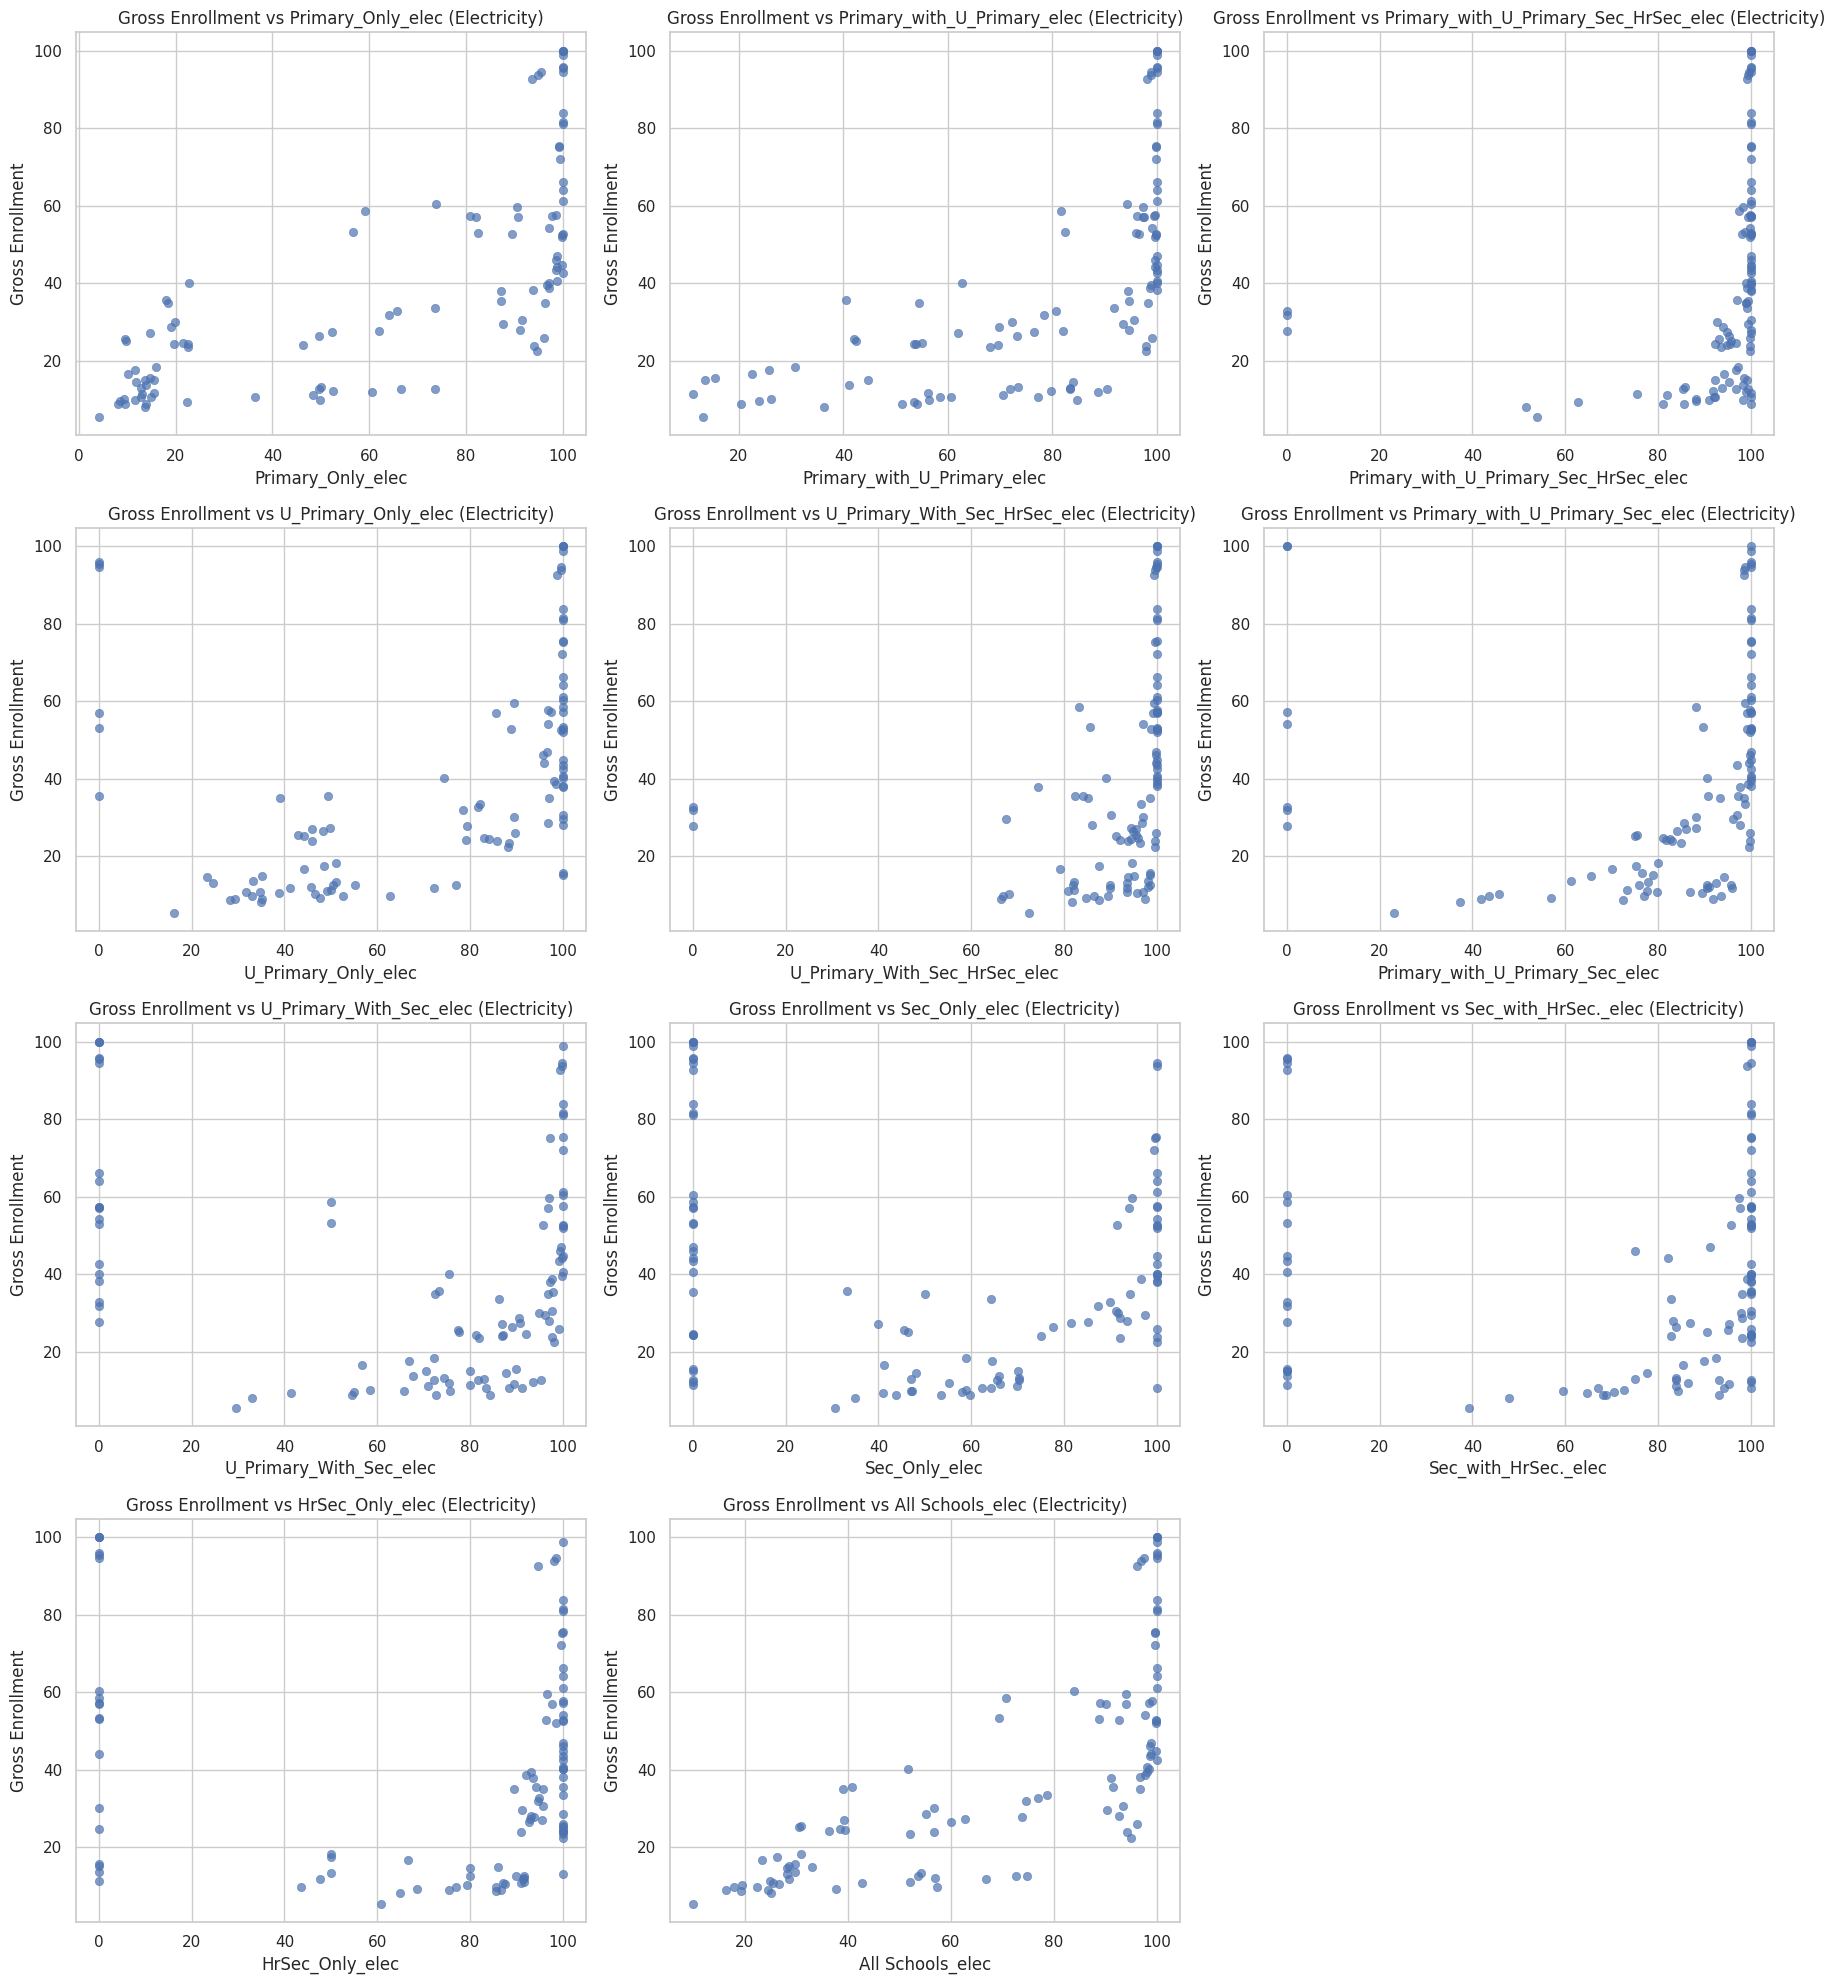

<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
<ipython-input-179-f03ea0bf22a6>:82: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=data[col], y=data[target], alpha=0.7, 

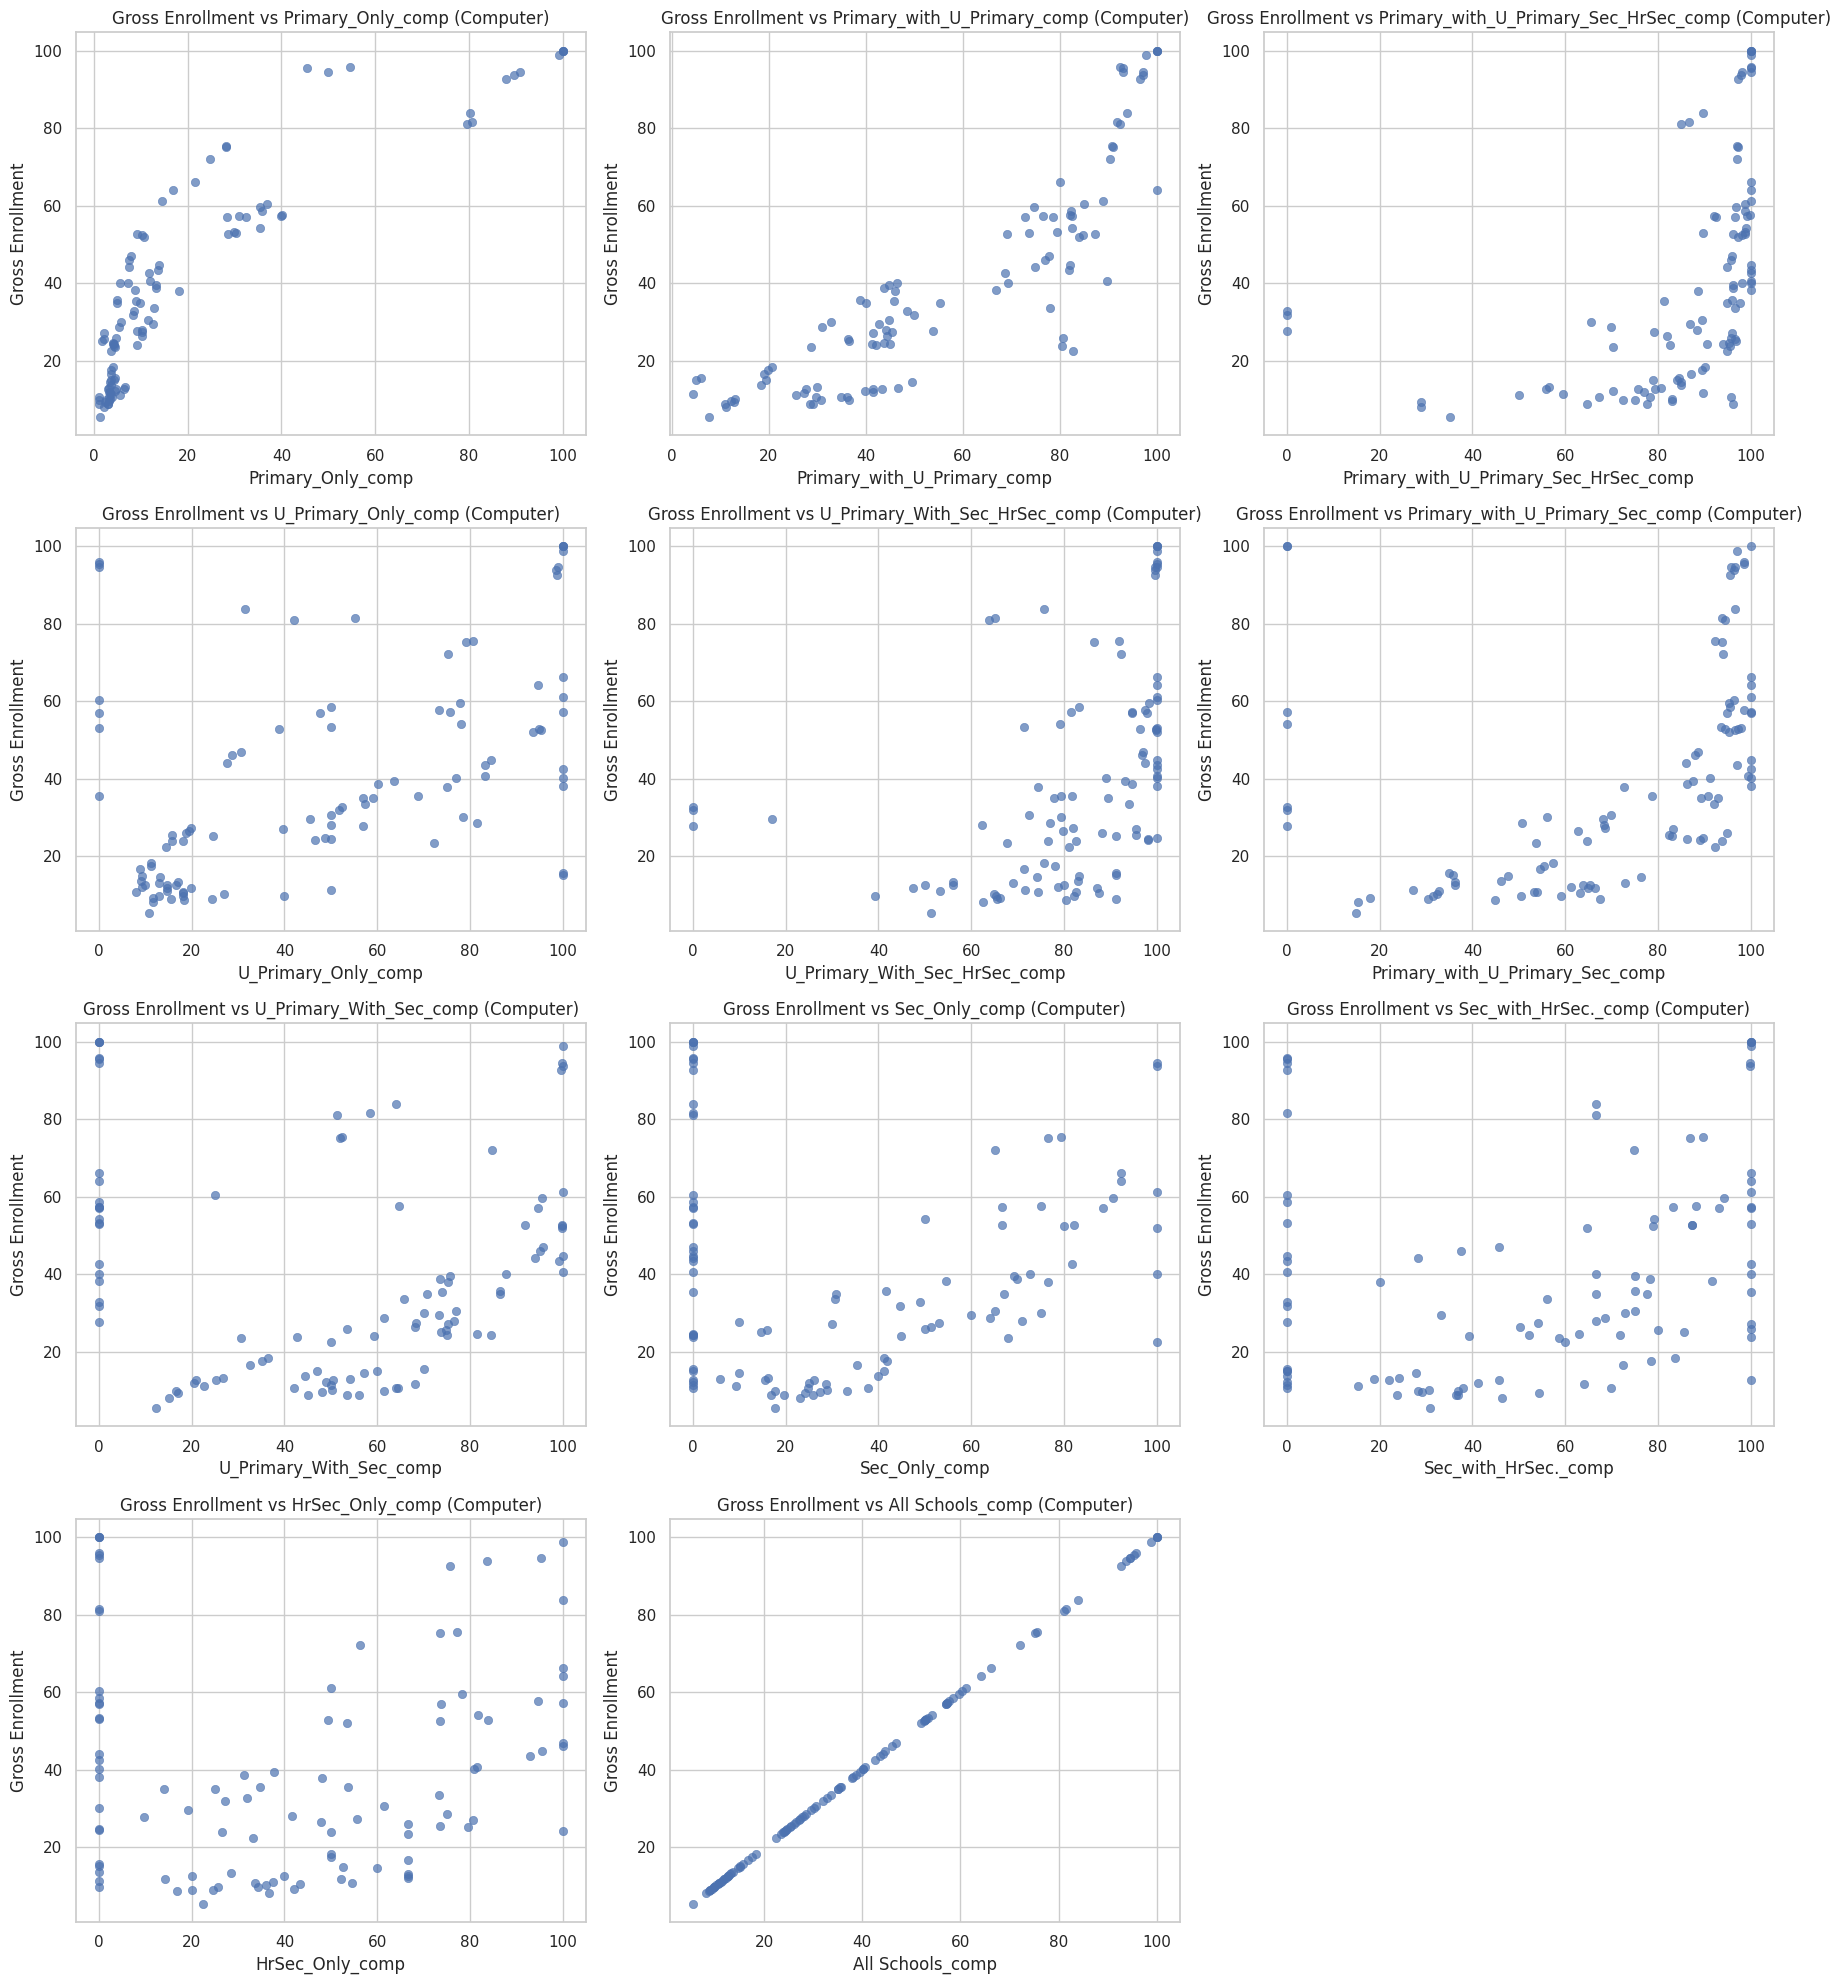

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load datasets
computers_df = pd.read_csv('SchoolWithComp.csv')
electricity_df = pd.read_csv('SchoolWithElec.csv')
gross_enrollment_df = pd.read_csv('GrossEnrollment.csv')

# Rename columns to ensure consistency
computers_df.rename(columns={'Year': 'year'}, inplace=True)
electricity_df.rename(columns={'Year': 'year'}, inplace=True)
gross_enrollment_df.rename(columns={'Year': 'year'}, inplace=True)

# Merge datasets
merged_data = pd.merge(computers_df, electricity_df, on=['State_UT', 'year'], suffixes=('_comp', '_elec'))
merged_data = pd.merge(merged_data, gross_enrollment_df, on=['State_UT', 'year'])

# Strip any leading or trailing spaces from column names
merged_data.columns = merged_data.columns.str.strip()

# Feature and target selection
features = [col for col in merged_data.columns if '_elec' in col or '_comp' in col]
target = 'All Schools_comp'  # Use correct column name
X = merged_data[features]
y = merged_data[target]

# Impute missing values
imputer = KNNImputer()
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=features)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=features)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training with GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Predict for the entire dataset
all_predictions = best_model.predict(X)
merged_data['Predicted_All_Schools'] = all_predictions

# Calculate correlation between predicted and actual gross enrollment
correlation = merged_data[['Predicted_All_Schools', 'All Schools_comp']].corr().iloc[0, 1]
print(f'Correlation between predicted and actual gross enrollment: {correlation}')

# Scatter plots for features vs. gross enrollment
def plot_feature_vs_enrollment(features, data, target, title_suffix):
    num_features = len(features)
    cols = 3  # Number of columns in subplot grid
    rows = int(np.ceil(num_features / cols))  # Number of rows needed

    plt.figure(figsize=(cols * 6, rows * 5))

    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        sns.scatterplot(x=data[col], y=data[target], alpha=0.7, edgecolor=None, palette='viridis')
        plt.xlabel(col)
        plt.ylabel('Gross Enrollment')
        plt.title(f'Gross Enrollment vs {col} {title_suffix}')
        plt.grid(True)
        plt.tight_layout()

    plt.show()

# Plot for electricity features
elec_features = [c for c in features if '_elec' in c]
plot_feature_vs_enrollment(elec_features, merged_data, 'All Schools_comp', '(Electricity)')

# Plot for computer features
comp_features = [c for c in features if '_comp' in c]
plot_feature_vs_enrollment(comp_features, merged_data, 'All Schools_comp', '(Computer)')


# **Exploratory Data Analysis 2**

In [ ]:
import pandas as pd

school_with_boyt = pd.read_csv('SchoolWithBoyt.csv')
school_with_girlt = pd.read_csv('SchoolWithGirlt.csv')
dropout_ratio = pd.read_csv('DropoutRatio.csv')

In [ ]:
school_with_boyt.columns = [col.strip().replace(' ', '_').lower() for col in school_with_boyt.columns]
school_with_girlt.columns = [col.strip().replace(' ', '_').lower() for col in school_with_girlt.columns]
dropout_ratio.columns = [col.strip().replace(' ', '_').lower() for col in dropout_ratio.columns]

# Merging the datasets on state and year
merged_df = pd.merge(school_with_boyt, school_with_girlt, on=['state_ut', 'year'], suffixes=('_boys', '_girls'))
merged_df = pd.merge(merged_df, dropout_ratio, on=['state_ut', 'year'])

In [ ]:
merged_df['total_toilets'] = (merged_df['all_schools_boys'] + merged_df['all_schools_girls']) / 2

In [ ]:
analysis_df = merged_df[['state_ut', 'year', 'total_toilets', 'primary_total', 'upper_primary_total', 'secondary__total', 'hrsecondary_total']]
print(analysis_df.head())

               state_ut     year  total_toilets  primary_total  \
0        Andhra Pradesh  2013-14         69.095           4.35   
1     Arunachal Pradesh  2014-15         96.430          10.82   
2                 Assam  2013-14         67.725           7.44   
3          Chhattisgarh  2014-15         84.030           2.91   
4  Dadra & Nagar Haveli  2013-14         89.945           1.57   

   upper_primary_total  secondary__total  hrsecondary_total  
0                 3.78             12.65              11.79  
1                 6.71             17.11              18.42  
2                 7.05             30.43               7.24  
3                 5.85             21.26               2.76  
4                 4.13             28.59               6.24  


<ipython-input-184-760670ed565c>:7: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=merged_df, x='total_toilets', y='avg_dropout_ratio', hue='state_ut', palette=palette, s=150, edgecolor='black', linewidth=1.5)


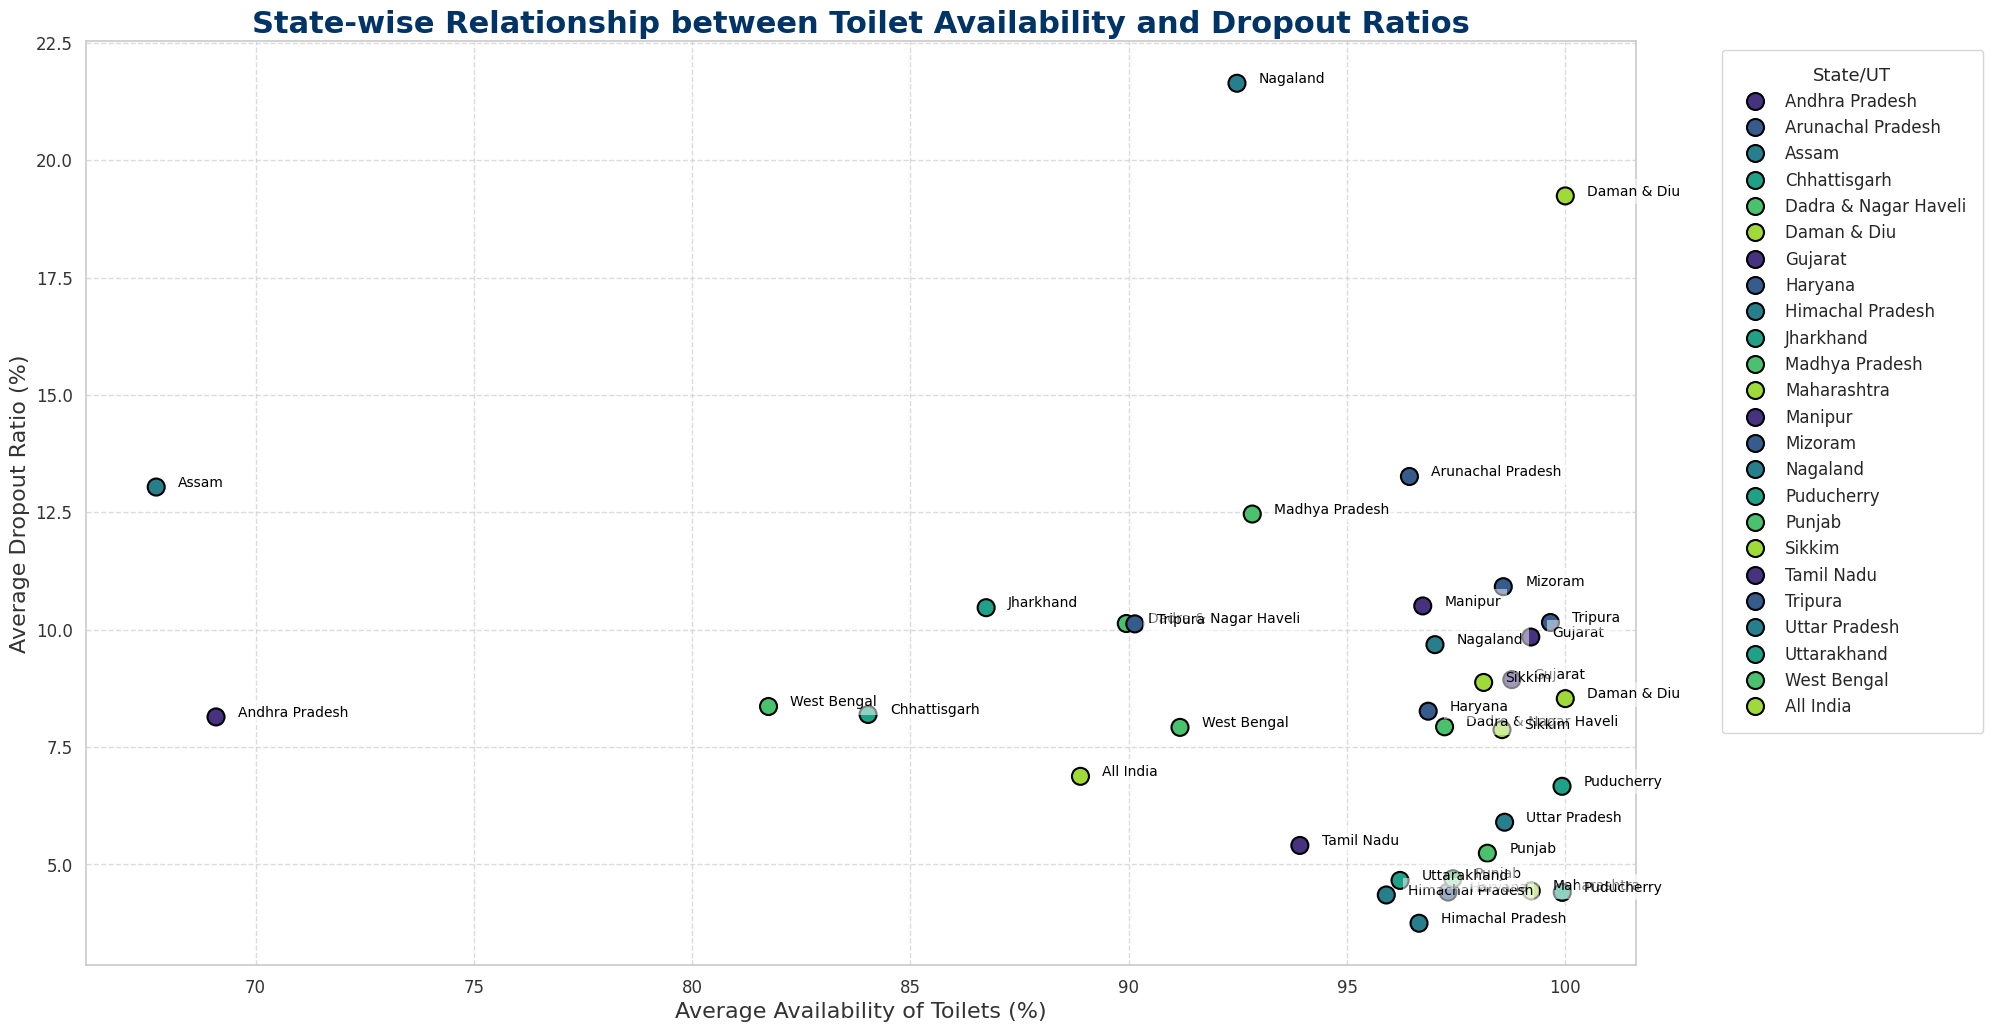

In [ ]:
merged_df['total_toilets'] = (merged_df['all_schools_boys'] + merged_df['all_schools_girls']) / 2
merged_df['avg_dropout_ratio'] = merged_df[['primary_total', 'upper_primary_total', 'secondary__total', 'hrsecondary_total']].mean(axis=1)

plt.figure(figsize=(20, 12))
palette = sns.color_palette('viridis', as_cmap=False)

sns.scatterplot(data=merged_df, x='total_toilets', y='avg_dropout_ratio', hue='state_ut', palette=palette, s=150, edgecolor='black', linewidth=1.5)

plt.title('State-wise Relationship between Toilet Availability and Dropout Ratios', fontsize=22, fontweight='bold', color='#003366')
plt.xlabel('Average Availability of Toilets (%)', fontsize=16, color='#333333')
plt.ylabel('Average Dropout Ratio (%)', fontsize=16, color='#333333')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State/UT', title_fontsize='13', fontsize='12', borderpad=1, frameon=True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

for i in range(len(merged_df)):
    plt.text(x=merged_df['total_toilets'][i] + 0.5,
             y=merged_df['avg_dropout_ratio'][i] + 0.01,
             s=merged_df['state_ut'][i],
             fontdict=dict(color='black', size=10),
             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.show()


<ipython-input-187-0ff86fb05540>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=statewise_avg, x='state_ut', y='total_toilets', ax=ax1, palette='coolwarm', label='Average Toilets Availability')
<ipython-input-187-0ff86fb05540>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=12, fontweight='bold')


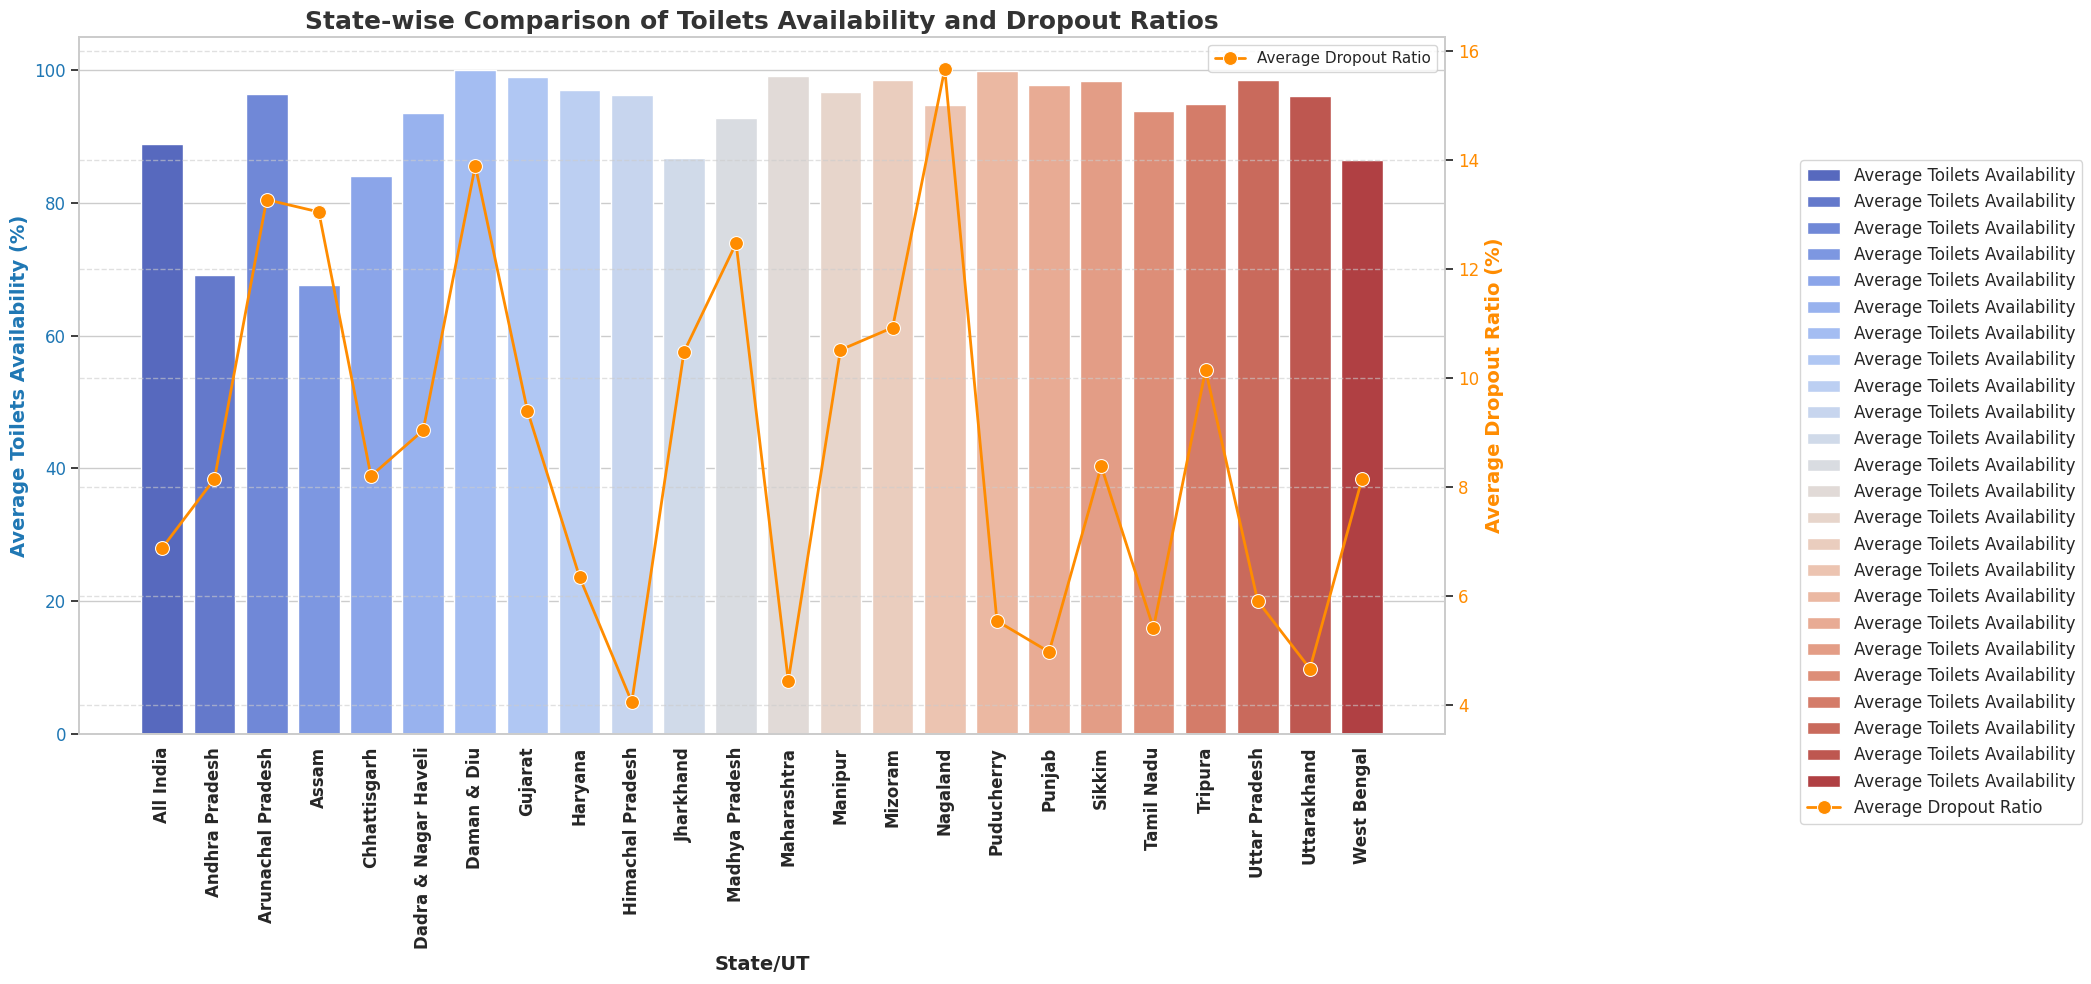

In [ ]:
merged_df['total_toilets'] = (merged_df['all_schools_boys'] + merged_df['all_schools_girls']) / 2
merged_df['avg_dropout_ratio'] = merged_df[['primary_total', 'upper_primary_total', 'secondary__total', 'hrsecondary_total']].mean(axis=1)

statewise_avg = merged_df.groupby('state_ut').agg({'total_toilets': 'mean', 'avg_dropout_ratio': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(18, 10))

sns.barplot(data=statewise_avg, x='state_ut', y='total_toilets', ax=ax1, palette='coolwarm', label='Average Toilets Availability')
ax1.set_ylabel('Average Toilets Availability (%)', color='#1f77b4', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='#1f77b4', labelsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=12, fontweight='bold')
ax1.set_xlabel('State/UT', fontsize=14, fontweight='bold')

ax2 = ax1.twinx()
sns.lineplot(data=statewise_avg, x='state_ut', y='avg_dropout_ratio', ax=ax2, color='darkorange', marker='o', markersize=10, linewidth=2, label='Average Dropout Ratio')
ax2.set_ylabel('Average Dropout Ratio (%)', color='darkorange', fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='darkorange', labelsize=12)

plt.title('State-wise Comparison of Toilets Availability and Dropout Ratios', fontsize=18, fontweight='bold', color='#333333')

# Adjust the plot layout to make room for the legend on the right
fig.tight_layout(rect=[0, 0, 0.85, 1])

# Place the legend outside the plot on the right
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=True)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



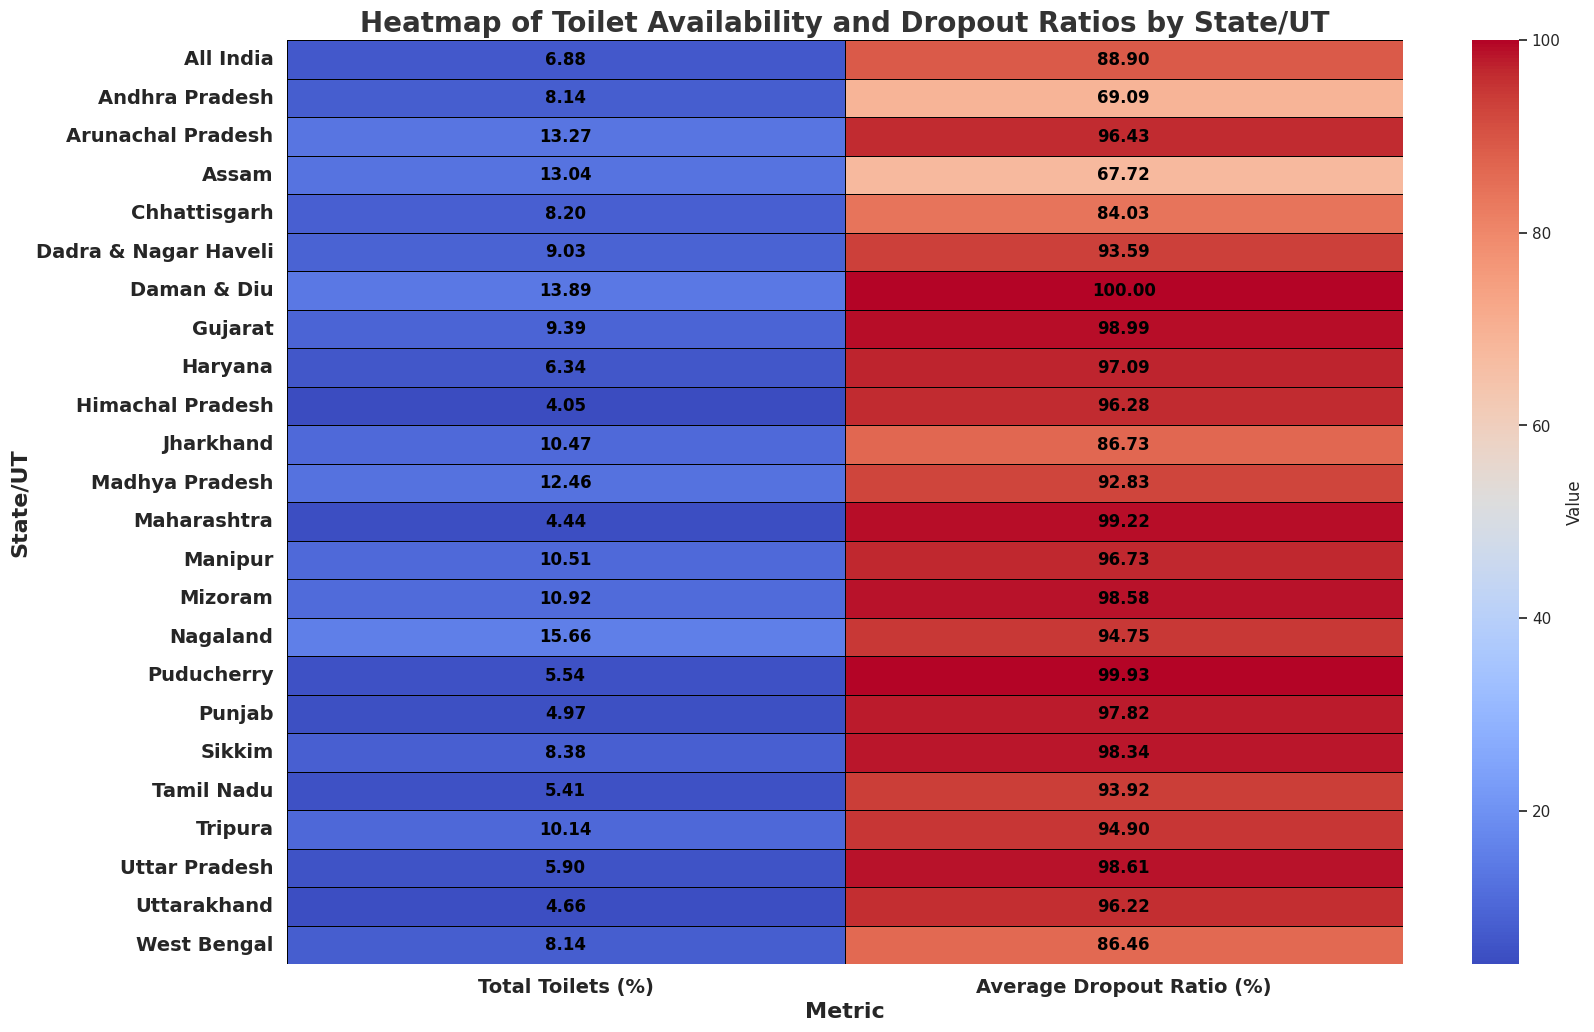

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = merged_df.pivot_table(
    index='state_ut',
    values=['total_toilets', 'avg_dropout_ratio']
)

plt.figure(figsize=(18, 12))
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.7,
    linecolor='black',
    cbar_kws={'label': 'Value'},
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'}
)

plt.title('Heatmap of Toilet Availability and Dropout Ratios by State/UT', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('Metric', fontsize=16, fontweight='bold')
plt.ylabel('State/UT', fontsize=16, fontweight='bold')

plt.xticks(ticks=[0.5, 1.5], labels=['Total Toilets (%)', 'Average Dropout Ratio (%)'], fontsize=14, rotation=0, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.show()

# **Random Forest**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

school_with_boyt = pd.read_csv('SchoolWithBoyt.csv')
school_with_girlt = pd.read_csv('SchoolWithGirlt.csv')
dropout_ratio = pd.read_csv('DropoutRatio.csv')


school_with_boyt.columns = [col.strip().replace(' ', '_').lower() for col in school_with_boyt.columns]
school_with_girlt.columns = [col.strip().replace(' ', '_').lower() for col in school_with_girlt.columns]
dropout_ratio.columns = [col.strip().replace(' ', '_').lower() for col in dropout_ratio.columns]


merged_df = pd.merge(school_with_boyt, school_with_girlt, on=['state_ut', 'year'], suffixes=('_boys', '_girls'))
merged_df = pd.merge(merged_df, dropout_ratio, on=['state_ut', 'year'])


merged_df['total_toilets'] = (merged_df['all_schools_boys'] + merged_df['all_schools_girls']) / 2
merged_df['avg_dropout_ratio'] = merged_df[['primary_total', 'upper_primary_total', 'secondary__total', 'hrsecondary_total']].mean(axis=1)


features = merged_df[['total_toilets', 'primary_total', 'upper_primary_total', 'secondary__total', 'hrsecondary_total']]
target = merged_df['avg_dropout_ratio']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}

results_df = pd.DataFrame(results).T
print(results_df)

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)
        print(f"Feature Importances for {name}:\n", importances)


                            MSE        R2
Linear Regression  5.634721e-30  1.000000
Random Forest      1.187956e+01  0.619155
Gradient Boosting  7.650119e+00  0.754746
Feature Importances for Random Forest:
 secondary__total       0.551672
hrsecondary_total      0.206900
upper_primary_total    0.119301
primary_total          0.063386
total_toilets          0.058740
dtype: float64
Feature Importances for Gradient Boosting:
 secondary__total       0.666108
hrsecondary_total      0.208265
upper_primary_total    0.058574
primary_total          0.052561
total_toilets          0.014491
dtype: float64


# **Availability of Toilets , Drop out Ratio**

**The availability of proper toilets in schools is a crucial factor influencing student retention, particularly in rural areas. A lack of sanitation facilities can lead to discomfort and health issues, discouraging students, especially girls, from attending school regularly. This often results in higher dropout rates, as students may feel compelled to leave school due to inadequate facilities.**

----------------------------------------------------------------
In this analysis, we examine the correlation between the number of toilets available and the dropout ratios across various states. By understanding this relationship, we can better address the infrastructural needs of schools and create a more conducive learning environment that encourages students to continue their education.

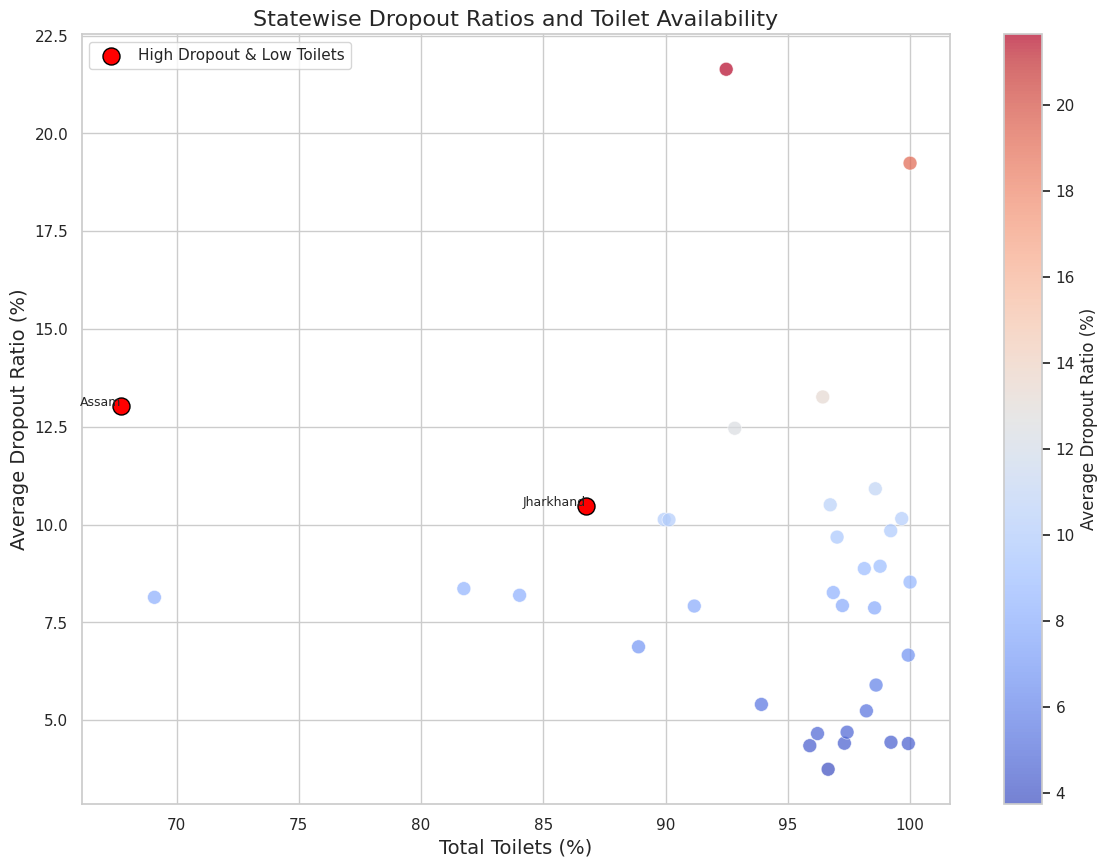

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


high_dropout_threshold = merged_df['avg_dropout_ratio'].quantile(0.75)
low_toilets_threshold = merged_df['total_toilets'].quantile(0.25)

plt.figure(figsize=(14, 10))


scatter = plt.scatter(
    merged_df['total_toilets'],
    merged_df['avg_dropout_ratio'],
    c=merged_df['avg_dropout_ratio'],
    cmap='coolwarm',
    s=100,
    alpha=0.7,
    edgecolors='w',
    linewidth=0.5
)

highlighted = merged_df[
    (merged_df['avg_dropout_ratio'] > high_dropout_threshold) &
    (merged_df['total_toilets'] < low_toilets_threshold)
]

plt.scatter(
    highlighted['total_toilets'],
    highlighted['avg_dropout_ratio'],
    color='red',
    edgecolors='black',
    s=150,
    label='High Dropout & Low Toilets'
)

cbar = plt.colorbar(scatter, label='Average Dropout Ratio (%)')
cbar.set_label('Average Dropout Ratio (%)')

plt.title('Statewise Dropout Ratios and Toilet Availability', fontsize=16)
plt.xlabel('Total Toilets (%)', fontsize=14)
plt.ylabel('Average Dropout Ratio (%)', fontsize=14)

plt.legend(loc='upper left')

for _, row in highlighted.iterrows():
    plt.text(
        row['total_toilets'],
        row['avg_dropout_ratio'],
        row['state_ut'],
        fontsize=9,
        ha='right'
    )

plt.grid(True)
plt.show()

**From this pictorial representation it is clear that states like Assam and Jharkand have higher ratios of Drop outs and lower availability of toilets.
Increasing the number of toilets could help promote continued education in these states**

# **Hexbin Plot**

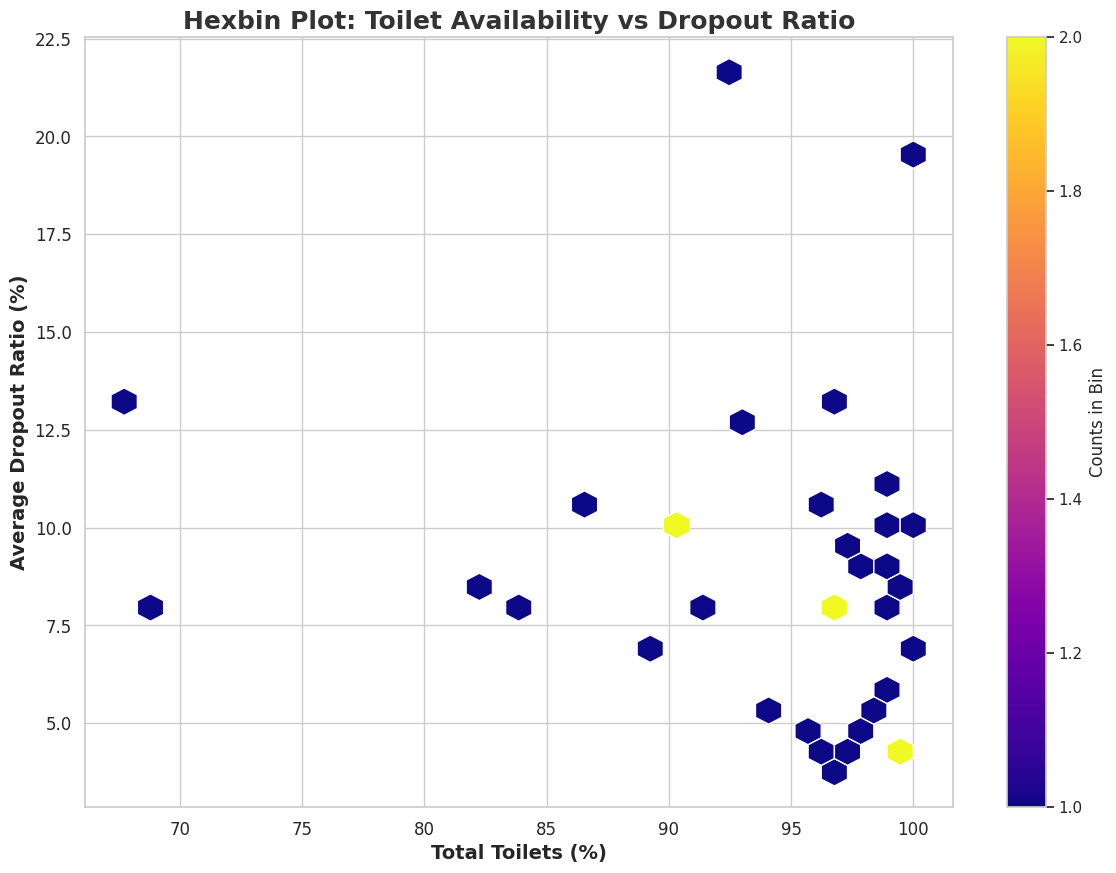

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.hexbin(
    merged_df['total_toilets'],
    merged_df['avg_dropout_ratio'],
    gridsize=30,
    cmap='plasma',
    mincnt=1,
    edgecolors='white'
)
plt.colorbar(label='Counts in Bin')
plt.title('Hexbin Plot: Toilet Availability vs Dropout Ratio', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Total Toilets (%)', fontsize=14, fontweight='bold')
plt.ylabel('Average Dropout Ratio (%)', fontsize=14, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
